# PennyLane YouTube tutorials

[YouTube PennyLane tutorials](https://www.youtube.com/watch?v=wcsosX6IHgE&list=PLzgi0kRtN5sO8dkomgshjSGDabnjtjBiA&index=1&ab_channel=PennyLane).

*Since the videos are not ordered, I try to follow them according to an improvised logic*

Notice that *lightning.qubit* only worked by cloning the associated repository in a separate folder.

## First Circuit with PennyLane

In order to build a quantum circuit in PennyLane, we need to merge two ingredients:

- **Device** 

It is an object that can apply quantum operations and return classical quantities (like measurements). 
It can be a real piece of quantum hardware or a simulator (like a default qubit). In PennyLane, quibits and wires are the same.

- **Quantum Function** 

It provides the device instructions for what quantum operations to apply.

In PennyLane, a *quantum node* encapsulates the device and the quantum function. It represents the unit of quantum computation.

In [1]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

In [2]:
# quantum device
dev = qml.device("default.qubit", wires=2)


# quantum node
@qml.qnode(dev)
# quantum function
def circuit(theta):
    qml.PauliX(wires=1)
    qml.CNOT(wires=[1, 0])
    qml.RY(theta, wires=0)

    return qml.expval(qml.PauliZ(wires=0))

1.0 

0: ────╭X──RY(3.14)─┤  <Z>
1: ──X─╰●───────────┤      



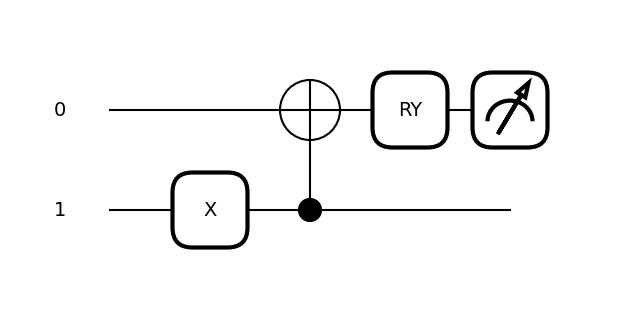

In [3]:
qml.drawer.use_style("black_white")
theta = np.pi

print(circuit(theta), "\n")

print(qml.draw(circuit)(theta), "\n")

fig, ax = qml.draw_mpl(circuit)(theta)
plt.show()

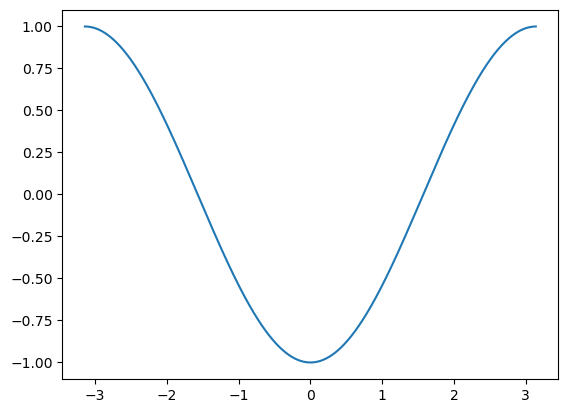

In [4]:
thetas = np.arange(-np.pi, np.pi, 0.01)
measurements = np.zeros(len(thetas))

for i, theta in enumerate(thetas):
    measurements[i] = circuit(theta)

plt.plot(thetas, measurements)
plt.show()

## Introduction to PennyLane Devices

Let's talk more about the "place" where we run quantum algorithms.

At this stage, we need to use quantum simulators since we still don't have real quantum hardware available.

The *default.qubit* is a state vector simulator.

In [5]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)


circuit()

tensor([0.5, 0.5], requires_grad=True)

*default.qubit* is a device written in Python, which is not the fastest language.

Let's use another simulator called *lightning.qubit* with the same idea, but written in C++ instead of Python.

In [6]:
dev = qml.device("lightning.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)


circuit()

tensor([0.5, 0.5], requires_grad=True)

Both *default.qubit* and *lightning.qubit* assume that we know exactly the quantum state we work with.

However, this is not necessarily true (for example if we have noise) and sometimes we need to work with mixed states.

A mixed state is a set of quantum states with different probabilities. Let's see this in PennyLane.

In [7]:
dev = qml.device("default.mixed", wires=1)


@qml.qnode(dev)
def circuit():
    qml.BitFlip(0.5, wires=0)
    return qml.probs(wires=0)


circuit()

array([0.5, 0.5])

We are writing *wires* everywhere because PennyLane can also work with *qmodes*. 

A qmode is the basic quantum unit information of a photonic quantum computer. This can also be simulated in PennyLane with *default.gaussian*.

We can also work with external plugins (see video or Xanadu page for further details).

## Optimizing a quantum circuit with PennyLane

Optimization is all about finding the minimum value of a function. 

Our quantum circuit is a function: it takes gates and parameters and returns measurements.

Notice that we need the specific 'numpy' version internally defined in PennyLane.

In [8]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

In [9]:
dev = qml.device("lightning.qubit", wires=1)


@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=0)
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))


circuit(0.1)

array(-0.99500417)

In [10]:
thetas = np.linspace(-np.pi, np.pi, 50)

measurements = []

for theta in thetas:
    measurements.append(circuit(theta))

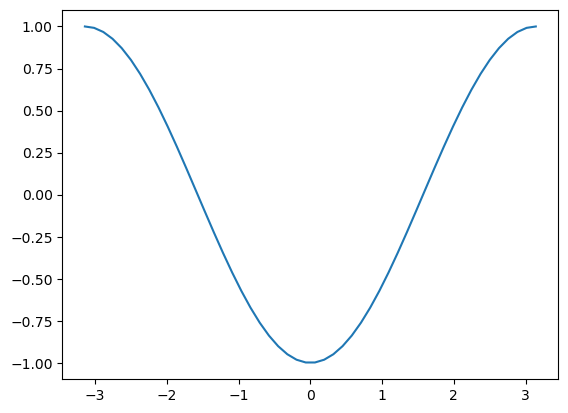

In [11]:
fig, ax = plt.subplots()
ax.plot(thetas, measurements)

For optimization, let's use a gradient-based method. 

We start at some random value of theta and find the gradient (that is, direction of maximum change of the function)

In [12]:
theta = np.array([-2.0], requires_grad=True)

In [13]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [14]:
n_it = 100

for it in range(n_it):
    theta, prev_cost = opt.step_and_cost(circuit, theta)
    if it % 10 == 0:
        print(f"Theta: {theta}, Cost: {circuit(theta)}")

Theta: [-1.90907026], Cost: 0.33185933611436363
Theta: [-0.95268251], Cost: -0.5794990037893345
Theta: [-0.35999832], Cost: -0.9358974149503752
Theta: [-0.12693105], Cost: -0.9919550642770163
Theta: [-0.04431925], Cost: -0.9990180628025327
Theta: [-0.01545577], Cost: -0.9998805620275653
Theta: [-0.0053892], Cost: -0.9999854782829674
Theta: [-0.0018791], Cost: -0.9999982344856905
Theta: [-0.0006552], Cost: -0.9999997853544914
Theta: [-0.00022846], Cost: -0.9999999739041142
